# 1 Uploading data
Here is the start of the ACW where I will upload a dataset.

P.S.: It takes a while to run the code. Sorry, not Sorry! :D

In [1]:
import pandas as pd
import seaborn as sns
#Upload a data set
medical_data = pd.read_csv('2020-DMDS-ACWData_fixed.csv')
medical_data

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.473452,198992,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,0.218756,253100,CVA,no,no,no,no,no,67.0,100,NoRisk
2,0.131260,155737,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,0.102954,251222,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,0.236142,197183,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.587315,113117,Asx,no,yes,yes,yes,no,74.0,100,Risk
1516,0.932265,103595,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,0.876531,211309,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,0.812032,116379,TIA,no,no,yes,yes,no,75.0,35,NoRisk


# 2 Clearing the data
In this section we are going clean data from any corrupted or null data. Also, we are going to clean any not necessary data or fix any duplicates, and fix issues with data.
## 2.1 Checking null data
Here we are going to check firstly for null data in the dataset. Then we will create a copy of the original dataset and will fill the corrupted or null values with mode if is categorical or with mean if is numeric value.

In [2]:
#Checking for null
medical_data.isnull().sum()

Random          0
Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [3]:
#Assigning the original data set to a traning one
train_copy = medical_data

In [4]:
#Cleaning categorical "Indication", null or corrupt values will be replace with the mode
mode = train_copy["Indication"].mode()
train_copy["Indication"] = train_copy["Indication"].fillna(value = mode[0])

In [5]:
#Cleaning categorical "Diabetes", null or corrupt values will be replace with the mode
mode = train_copy["Diabetes"].mode()
train_copy["Diabetes"] = train_copy["Diabetes"].fillna(value = mode[0])

In [6]:
#Cleaning categorical column "Hypertension", null or corrupt values will be replace with the mode
mode = train_copy["Hypertension"].mode()
train_copy["Hypertension"] = train_copy["Hypertension"].fillna(value = mode[0])

In [7]:
#Cleaning categorical column "History", null or corrupt values will be replace with the mode
mode = train_copy["History"].mode()
train_copy["History"] = train_copy["History"].fillna(value = mode[0])

In [8]:
#Cleaning numeric columns "IPSI" and replace corrupt values with the mean. 
mean = train_copy['IPSI'].mean()
train_copy['IPSI'] = train_copy['IPSI'].fillna(value = mean)

In [9]:
#Cleaning categorical column "label", null or corrupt values will be replace with the mode
mode = train_copy["label"].mode()
train_copy["label"] = train_copy["label"].fillna(value = mode[0])

In [10]:
#Checking again for null values to see if null values have been fixed
train_copy.isnull().sum()

Random          0
Id              0
Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

## 2.2 Checking for duplicates
Here we will check the data if it has any duplicated values and will fix it if necessary.

In [11]:
#Checking data for any duplicated values
train_copy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1515    False
1516    False
1517    False
1518    False
1519    False
Length: 1520, dtype: bool

## 2.3 Checking columns
In this subsection we are going to check each column for unique value to see if any column has strange or not common values and fix the issues which will be found.

In [12]:
#Checking all columns for any strange values
random_value = train_copy["Random"]
uniqueRandom = random_value.unique()
uniqueRandom

array([0.47345233, 0.21875631, 0.13125952, ..., 0.58731504, 0.87653067,
       0.51768805])

In [13]:
id_value = train_copy["Id"]
uniqueId = id_value.unique()
uniqueId

array([198992, 253100, 155737, ..., 211309, 116379, 172848], dtype=int64)

In [14]:
indication_value = train_copy["Indication"]
uniqueIndication = indication_value.unique()
uniqueIndication

array(['CVA', 'A-F', 'ASx', 'TIA', 'Asx'], dtype=object)

In [15]:
diabetes_value = train_copy["Diabetes"]
uniqueDiabetes = diabetes_value.unique()
uniqueDiabetes

array(['yes', 'no'], dtype=object)

In [16]:
ihd_value = train_copy["IHD"]
uniqueIHD = ihd_value.unique()
uniqueIHD

array(['yes', 'no'], dtype=object)

In [17]:
hypertension_value = train_copy["Hypertension"]
uniqueHypertension = hypertension_value.unique()
uniqueHypertension

array(['yes', 'no'], dtype=object)

In [18]:
arrhythmia_value = train_copy["Arrhythmia"]
uniqueArrhythmia = arrhythmia_value.unique()
uniqueArrhythmia

array(['yes', 'no'], dtype=object)

In [19]:
history_value = train_copy["History"]
uniqueHistory = history_value.unique()
uniqueHistory

array(['no', 'yes'], dtype=object)

In [20]:
ipsi_value = train_copy["IPSI"]
uniqueIPSI = ipsi_value.unique()
uniqueIPSI

array([89.        , 67.        , 79.        , 69.        , 74.        ,
       77.        , 94.        , 84.        , 49.        , 80.        ,
       98.        , 59.        , 77.87203166, 72.        , 75.        ,
       70.        , 73.        , 81.        , 54.        , 76.        ,
       78.        , 66.        , 68.        , 50.        , 64.        ,
       83.        , 96.        , 71.        , 34.        , 97.        ])

In [21]:
contra_value = train_copy["Contra"]
uniqueContra = contra_value.unique()
uniqueContra

array(['100', '20', '40', '30', '80', '50', '45', '95', '65', '90', '60',
       '75', '10', '70', '53', '55', '35', '51', '85', '25', '15', '73',
       '16', '62', '79', ' '], dtype=object)

In [22]:
label_value = train_copy["label"]
uniqueLabel = label_value.unique()
uniqueLabel

array(['Risk', 'NoRisk', 'Unknown'], dtype=object)

In [23]:
#Droping the 'Unknow' value
cleaned_data = train_copy.drop(train_copy[train_copy['label'] == 'Unknown'].index)
label_value = cleaned_data["label"]
uniqueLabel = label_value.unique()
uniqueLabel

array(['Risk', 'NoRisk'], dtype=object)

In [24]:
#Droping the value empty string
cleaned_data = cleaned_data.drop(train_copy[train_copy['Contra'] == ' '].index  )
contra_value = cleaned_data["Contra"]
uniqueContra = contra_value.unique()
uniqueContra

array(['100', '20', '40', '30', '80', '50', '45', '95', '65', '90', '60',
       '75', '10', '70', '53', '55', '35', '51', '85', '25', '15', '73',
       '16', '62', '79'], dtype=object)

In [25]:
#Changing string 'Asx' to 'ASx' as it same name
cleaned_data["Indication"] = train_copy["Indication"].str.replace('Asx', 'ASx')
indication_value = cleaned_data["Indication"]
uniqueIndication = indication_value.unique()
uniqueIndication

array(['CVA', 'A-F', 'ASx', 'TIA'], dtype=object)

# 3 Filtering data
In this section we are going to filter the data set. We will drop not needed columns such as "Random" and "Id".

In [26]:
#Droping the "Random" and "Id" columns
filtered_data = cleaned_data.drop(['Random', 'Id'], axis=1)
filtered_data

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,CVA,yes,yes,yes,yes,no,89.0,100,Risk
1,CVA,no,no,no,no,no,67.0,100,NoRisk
2,CVA,no,yes,yes,no,no,79.0,20,NoRisk
3,A-F,no,yes,no,no,no,69.0,40,NoRisk
4,CVA,no,no,no,no,no,89.0,30,NoRisk
...,...,...,...,...,...,...,...,...,...
1515,ASx,no,yes,yes,yes,no,74.0,100,Risk
1516,CVA,no,yes,yes,no,no,84.0,50,NoRisk
1517,CVA,no,no,yes,no,no,76.0,20,NoRisk
1518,TIA,no,no,yes,yes,no,75.0,35,NoRisk


In [27]:
filtered_data.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

# 4 Transforming data
In thi section we are going to transform data. Firstly we will convert Nominal data type such as "Indication" and "label". The rest columns with nominal we are going to convert into numeric type to be able to proceed to next step of modelling. Finally we will recombine them with all the dummies made and rest of our original table, and will rename the columns name to assign appropriate naming to them.

In [28]:
#Convert Nominal data type "Indication" using get_dummies
dummies_indications = pd.get_dummies(filtered_data['Indication'], prefix='Indication')
dummies_indications

,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
1515,0,1,0,0
1516,0,0,1,0
1517,0,0,1,0
1518,0,0,0,1


In [29]:
##Convert Nominal data type "label" using get_dummies
dummies_label = pd.get_dummies(filtered_data['label'])
dummies_label = dummies_label.drop(['NoRisk'],  axis=1)
dummies_label

,Risk
0,1
1,0
2,0
3,0
4,0
...,...
1515,1
1516,0
1517,0
1518,0


In [30]:
dummies_diabetes = pd.get_dummies(filtered_data['Diabetes'], prefix='Diabetes')
dummies_diabetes = dummies_diabetes.drop(['Diabetes_no'],  axis=1)
dummies_diabetes

,Diabetes_yes
0,1
1,0
2,0
3,0
4,0
...,...
1515,0
1516,0
1517,0
1518,0


In [31]:
dummies_ihd = pd.get_dummies(filtered_data['IHD'], prefix='IHD')
dummies_ihd = dummies_ihd.drop(['IHD_no'],  axis=1)
dummies_ihd

,IHD_yes
0,1
1,0
2,1
3,1
4,0
...,...
1515,1
1516,1
1517,0
1518,0


In [32]:
dummies_hypertension = pd.get_dummies(filtered_data['Hypertension'], prefix='Hypertension')
dummies_hypertension = dummies_hypertension.drop(['Hypertension_no'],  axis=1)
dummies_hypertension

,Hypertension_yes
0,1
1,0
2,1
3,0
4,0
...,...
1515,1
1516,1
1517,1
1518,1


In [33]:
dummies_arrhythmia = pd.get_dummies(filtered_data['Arrhythmia'], prefix='Arrhythmia')
dummies_arrhythmia = dummies_arrhythmia.drop(['Arrhythmia_no'],  axis=1)
dummies_arrhythmia

,Arrhythmia_yes
0,1
1,0
2,0
3,0
4,0
...,...
1515,1
1516,0
1517,0
1518,1


In [34]:
dummies_history = pd.get_dummies(filtered_data['History'], prefix='History')
dummies_history = dummies_history.drop(['History_no'],  axis=1)
dummies_history

,History_yes
0,0
1,0
2,0
3,0
4,0
...,...
1515,0
1516,0
1517,0
1518,0


In [35]:
#Connect the created dummies
get_dummy = pd.concat([dummies_indications, dummies_diabetes, dummies_ihd, dummies_hypertension, 
                       dummies_arrhythmia, dummies_history], axis = 1)
get_dummy

,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_yes,IHD_yes,Hypertension_yes,Arrhythmia_yes,History_yes
0,0,0,1,0,1,1,1,1,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,1,1,1,0
1516,0,0,1,0,0,1,1,0,0
1517,0,0,1,0,0,0,1,0,0
1518,0,0,0,1,0,0,1,1,0


In [36]:
#Get separated dataframe for our dummy variables
get_data = filtered_data[['IPSI', 'Contra']]
get_data

,IPSI,Contra
0,89.0,100
1,67.0,100
2,79.0,20
3,69.0,40
4,89.0,30
...,...,...
1515,74.0,100
1516,84.0,50
1517,76.0,20
1518,75.0,35


In [37]:
#Now we will recombine them with our original table. Grab original dataframe(get_data), 
##and concatenate these with the dummies.
full_data = pd.concat([get_dummy, get_data, dummies_label], axis = 1)
full_data

,Indication_A-F,Indication_ASx,Indication_CVA,Indication_TIA,Diabetes_yes,IHD_yes,Hypertension_yes,Arrhythmia_yes,History_yes,IPSI,Contra,Risk
0,0,0,1,0,1,1,1,1,0,89.0,100,1
1,0,0,1,0,0,0,0,0,0,67.0,100,0
2,0,0,1,0,0,1,1,0,0,79.0,20,0
3,1,0,0,0,0,1,0,0,0,69.0,40,0
4,0,0,1,0,0,0,0,0,0,89.0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,1,1,1,0,74.0,100,1
1516,0,0,1,0,0,1,1,0,0,84.0,50,0
1517,0,0,1,0,0,0,1,0,0,76.0,20,0
1518,0,0,0,1,0,0,1,1,0,75.0,35,0


In [38]:
#Renaming the columns
full_data = full_data.rename(columns = {'Diabetes_yes' : 'Diabetes', 'IHD_yes' : 'IHD', 'Hypertension_yes' : 'Hypertension',
                                       'Arrhythmia_yes' : 'Arrhythmia', 'History_yes' : 'History', 'Indication_A-F' : 'A-F',
                                       'Indication_ASx' : 'ASX', 'Indication_CVA' : 'CVA', 'Indication_TIA' : 'TIA'})
full_data

,A-F,ASX,CVA,TIA,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Risk
0,0,0,1,0,1,1,1,1,0,89.0,100,1
1,0,0,1,0,0,0,0,0,0,67.0,100,0
2,0,0,1,0,0,1,1,0,0,79.0,20,0
3,1,0,0,0,0,1,0,0,0,69.0,40,0
4,0,0,1,0,0,0,0,0,0,89.0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,0,1,1,1,0,74.0,100,1
1516,0,0,1,0,0,1,1,0,0,84.0,50,0
1517,0,0,1,0,0,0,1,0,0,76.0,20,0
1518,0,0,0,1,0,0,1,1,0,75.0,35,0


# 5 Plotting
In this section we are going to plot several graphs to visualize the data relation such as Correlation Heatmap and visualize the diseas comparison of patiance with the risk of the mortality.
## 5.1 Plot cleaned dataset to view heatmaps
Here we are going to visualise the Correlation Heatmap. Correlation matrices are an essential tool of exploratory data analysis. Correlation heatmaps contain the same information in a visually appealing way. Also, they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems.

A diverging color palette that has markedly different colors at the two ends of the value-range with a pale, almost colorless midpoint, works much better with correlation heatmaps than the default colormap. While illustrating this statement, let’s add one more little detail: how to save a heatmap to a png file with all the x- and y- labels (xticklabels and yticklabels) visible.

The Correlation Heatmap is going to help us find lesser significance relation to our task which let us finish the filtering process.

Code Reference: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

Text(0.5, 1.0, 'Correlation Heatmap')

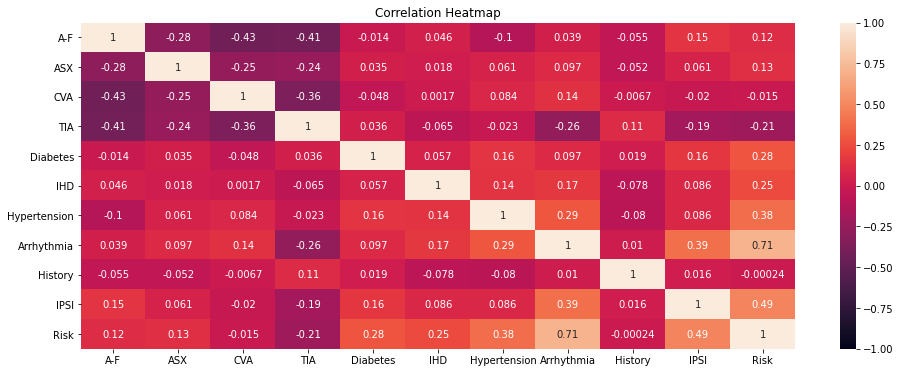

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(full_data.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap')

After plotting Correlation heatmap we have noticed that some of the disease columns has negative values towards risk which means it have lesser significance to the risk of the mortality to patience so columns ‘CVA’ and ‘History’ been decided to be dropped 

In [40]:
full_data = full_data.drop(['CVA', 'History'], axis=1)
full_data

,A-F,ASX,TIA,Diabetes,IHD,Hypertension,Arrhythmia,IPSI,Contra,Risk
0,0,0,0,1,1,1,1,89.0,100,1
1,0,0,0,0,0,0,0,67.0,100,0
2,0,0,0,0,1,1,0,79.0,20,0
3,1,0,0,0,1,0,0,69.0,40,0
4,0,0,0,0,0,0,0,89.0,30,0
...,...,...,...,...,...,...,...,...,...,...
1515,0,1,0,0,1,1,1,74.0,100,1
1516,0,0,0,0,1,1,0,84.0,50,0
1517,0,0,0,0,0,1,0,76.0,20,0
1518,0,0,1,0,0,1,1,75.0,35,0


## 5.2 Scatterplot
A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. This type of graph is going to be used to visualize each deases compared to Contra and each diseas relation of pation at risk of mortality or not.

Reference: https://en.wikipedia.org/wiki/Scatter_plot#:~:text=A%20scatter%20plot%20(also%20called,for%20a%20set%20of%20data.

<AxesSubplot:xlabel='Diabetes', ylabel='Contra'>

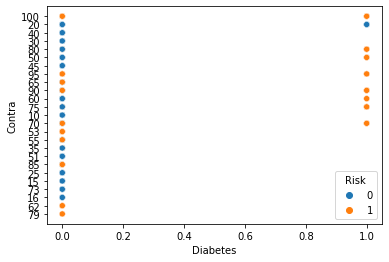

In [41]:
sns.scatterplot(data = full_data, x = 'Diabetes', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='IHD', ylabel='Contra'>

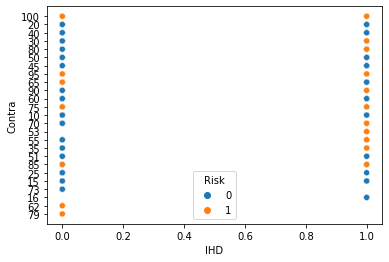

In [42]:
sns.scatterplot(data = full_data, x = 'IHD', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='Hypertension', ylabel='Contra'>

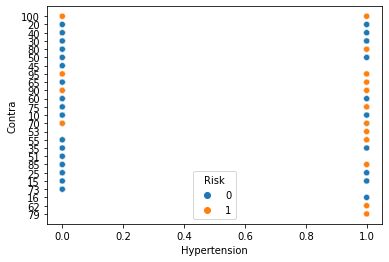

In [43]:
sns.scatterplot(data = full_data, x = 'Hypertension', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='Arrhythmia', ylabel='Contra'>

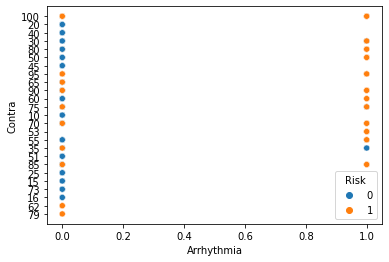

In [44]:
sns.scatterplot(data = full_data, x = 'Arrhythmia', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='IPSI', ylabel='Contra'>

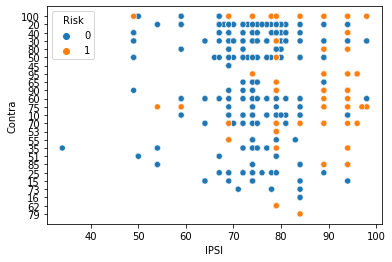

In [45]:
sns.scatterplot(data = full_data, x = 'IPSI', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='A-F', ylabel='Contra'>

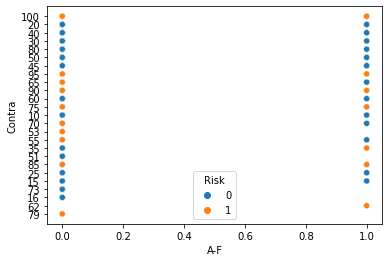

In [46]:
sns.scatterplot(data = full_data, x = 'A-F', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='ASX', ylabel='Contra'>

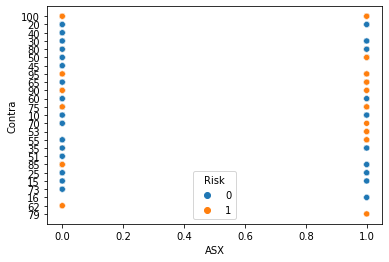

In [47]:
sns.scatterplot(data = full_data, x = 'ASX', y = 'Contra', hue = 'Risk')

In [48]:
#sns.scatterplot(data = full_data, x = 'CVA', y = 'Contra', hue = 'Risk')

<AxesSubplot:xlabel='TIA', ylabel='Contra'>

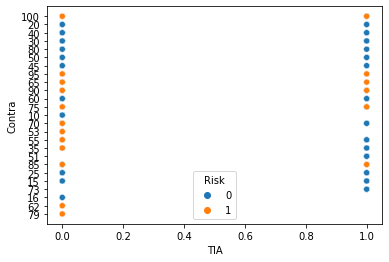

In [49]:
sns.scatterplot(data = full_data, x = 'TIA', y = 'Contra', hue = 'Risk')

## 5.3 Boxplot
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range. This type of graph is going to be used to visualize each deases compared to IPSI and determined the “outliers”.

Reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:xlabel='Hypertension', ylabel='IPSI'>

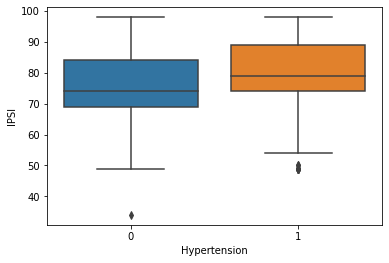

In [50]:
sns.boxplot(data = full_data, x = 'Hypertension', y = 'IPSI')

<AxesSubplot:xlabel='Diabetes', ylabel='IPSI'>

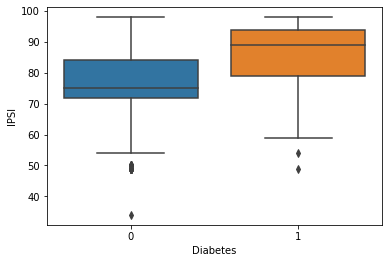

In [51]:
sns.boxplot(data = full_data, x = 'Diabetes', y = 'IPSI')

<AxesSubplot:xlabel='IHD', ylabel='IPSI'>

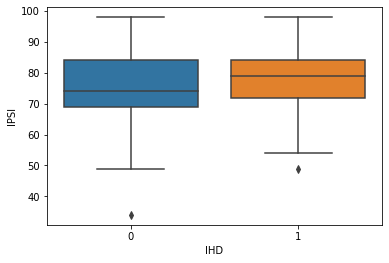

In [52]:
sns.boxplot(data = full_data, x = 'IHD', y = 'IPSI')

<AxesSubplot:xlabel='Arrhythmia', ylabel='IPSI'>

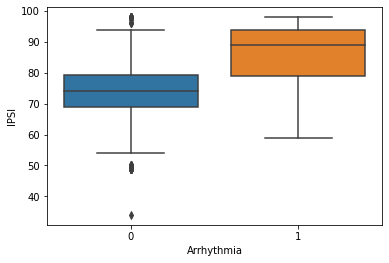

In [53]:
sns.boxplot(data = full_data, x = 'Arrhythmia', y = 'IPSI')

In [54]:
#sns.boxplot(data = full_data, x = 'History', y = 'IPSI')

<AxesSubplot:xlabel='A-F', ylabel='IPSI'>

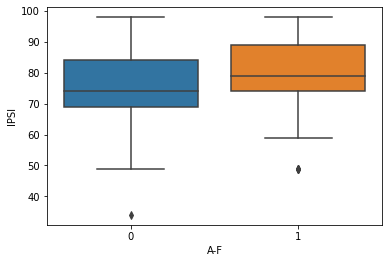

In [55]:
sns.boxplot(data = full_data, x = 'A-F', y = 'IPSI')

<AxesSubplot:xlabel='ASX', ylabel='IPSI'>

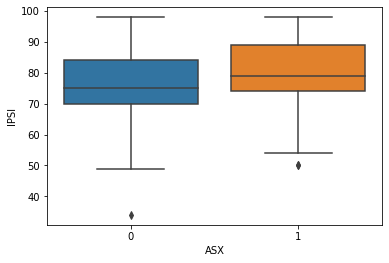

In [56]:
sns.boxplot(data = full_data, x = 'ASX', y = 'IPSI')

In [57]:
#sns.boxplot(data = full_data, x = 'CVA', y = 'IPSI')

<AxesSubplot:xlabel='TIA', ylabel='IPSI'>

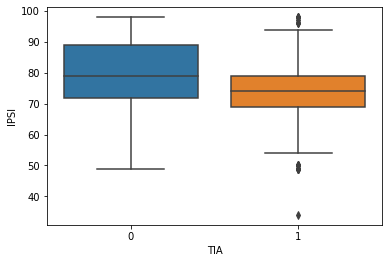

In [58]:
sns.boxplot(data = full_data, x = 'TIA', y = 'IPSI')

## 5.4 Relplot
The one we will use most is relplot(). This is a figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot(), lineplot(). This type of graph is going to be used to visualize each deases compared to Contra and each diseas relation of pation at risk of mortality or not.

Refrence: https://seaborn.pydata.org/tutorial/relational.html

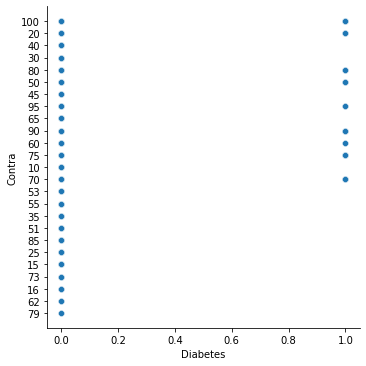

In [59]:
sns.relplot(data = full_data, x = 'Diabetes', y = 'Contra')

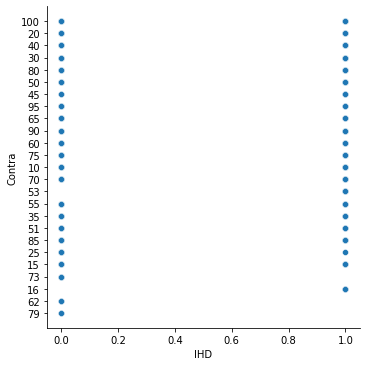

In [60]:
sns.relplot(data = full_data, x = 'IHD', y = 'Contra')

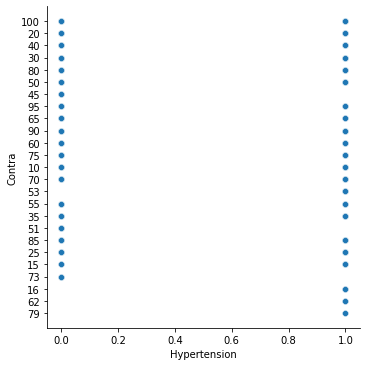

In [61]:
sns.relplot(data = full_data, x = 'Hypertension', y = 'Contra')

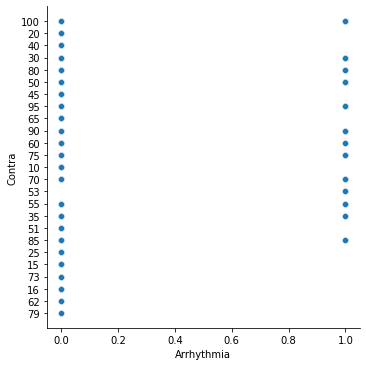

In [62]:
sns.relplot(data = full_data, x = 'Arrhythmia', y = 'Contra')

In [63]:
#sns.relplot(data = full_data, x = 'History', y = 'Contra')

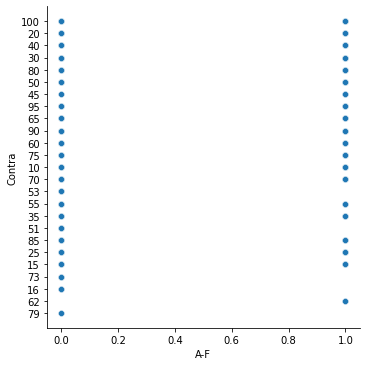

In [64]:
sns.relplot(data = full_data, x = 'A-F', y = 'Contra')

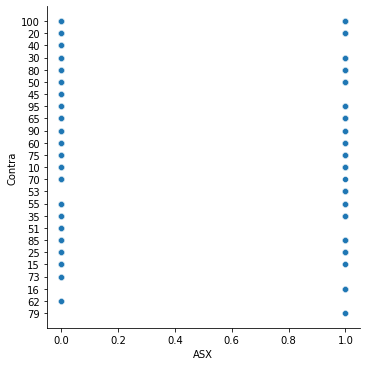

In [65]:
sns.relplot(data = full_data, x = 'ASX', y = 'Contra')

In [66]:
#sns.relplot(data = full_data, x = 'CVA', y = 'Contra')

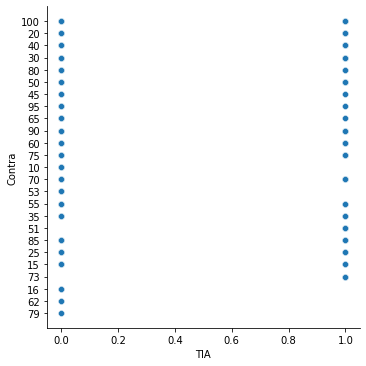

In [67]:
sns.relplot(data = full_data, x = 'TIA', y = 'Contra')

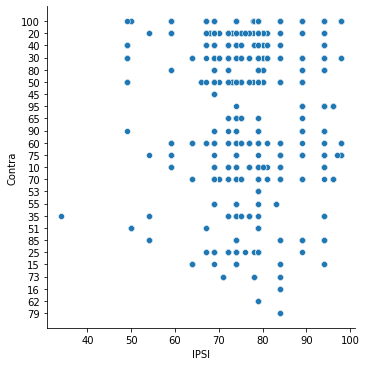

In [68]:
sns.relplot(data = full_data, x = 'IPSI', y = 'Contra')

## 5.5 Pairplot
A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. This type of graphs is going to be used to visualize each deases compared to Contra and each diseas relation of pation at risk of mortality or not.

Reference: https://pythonbasics.org/seaborn-pairplot/

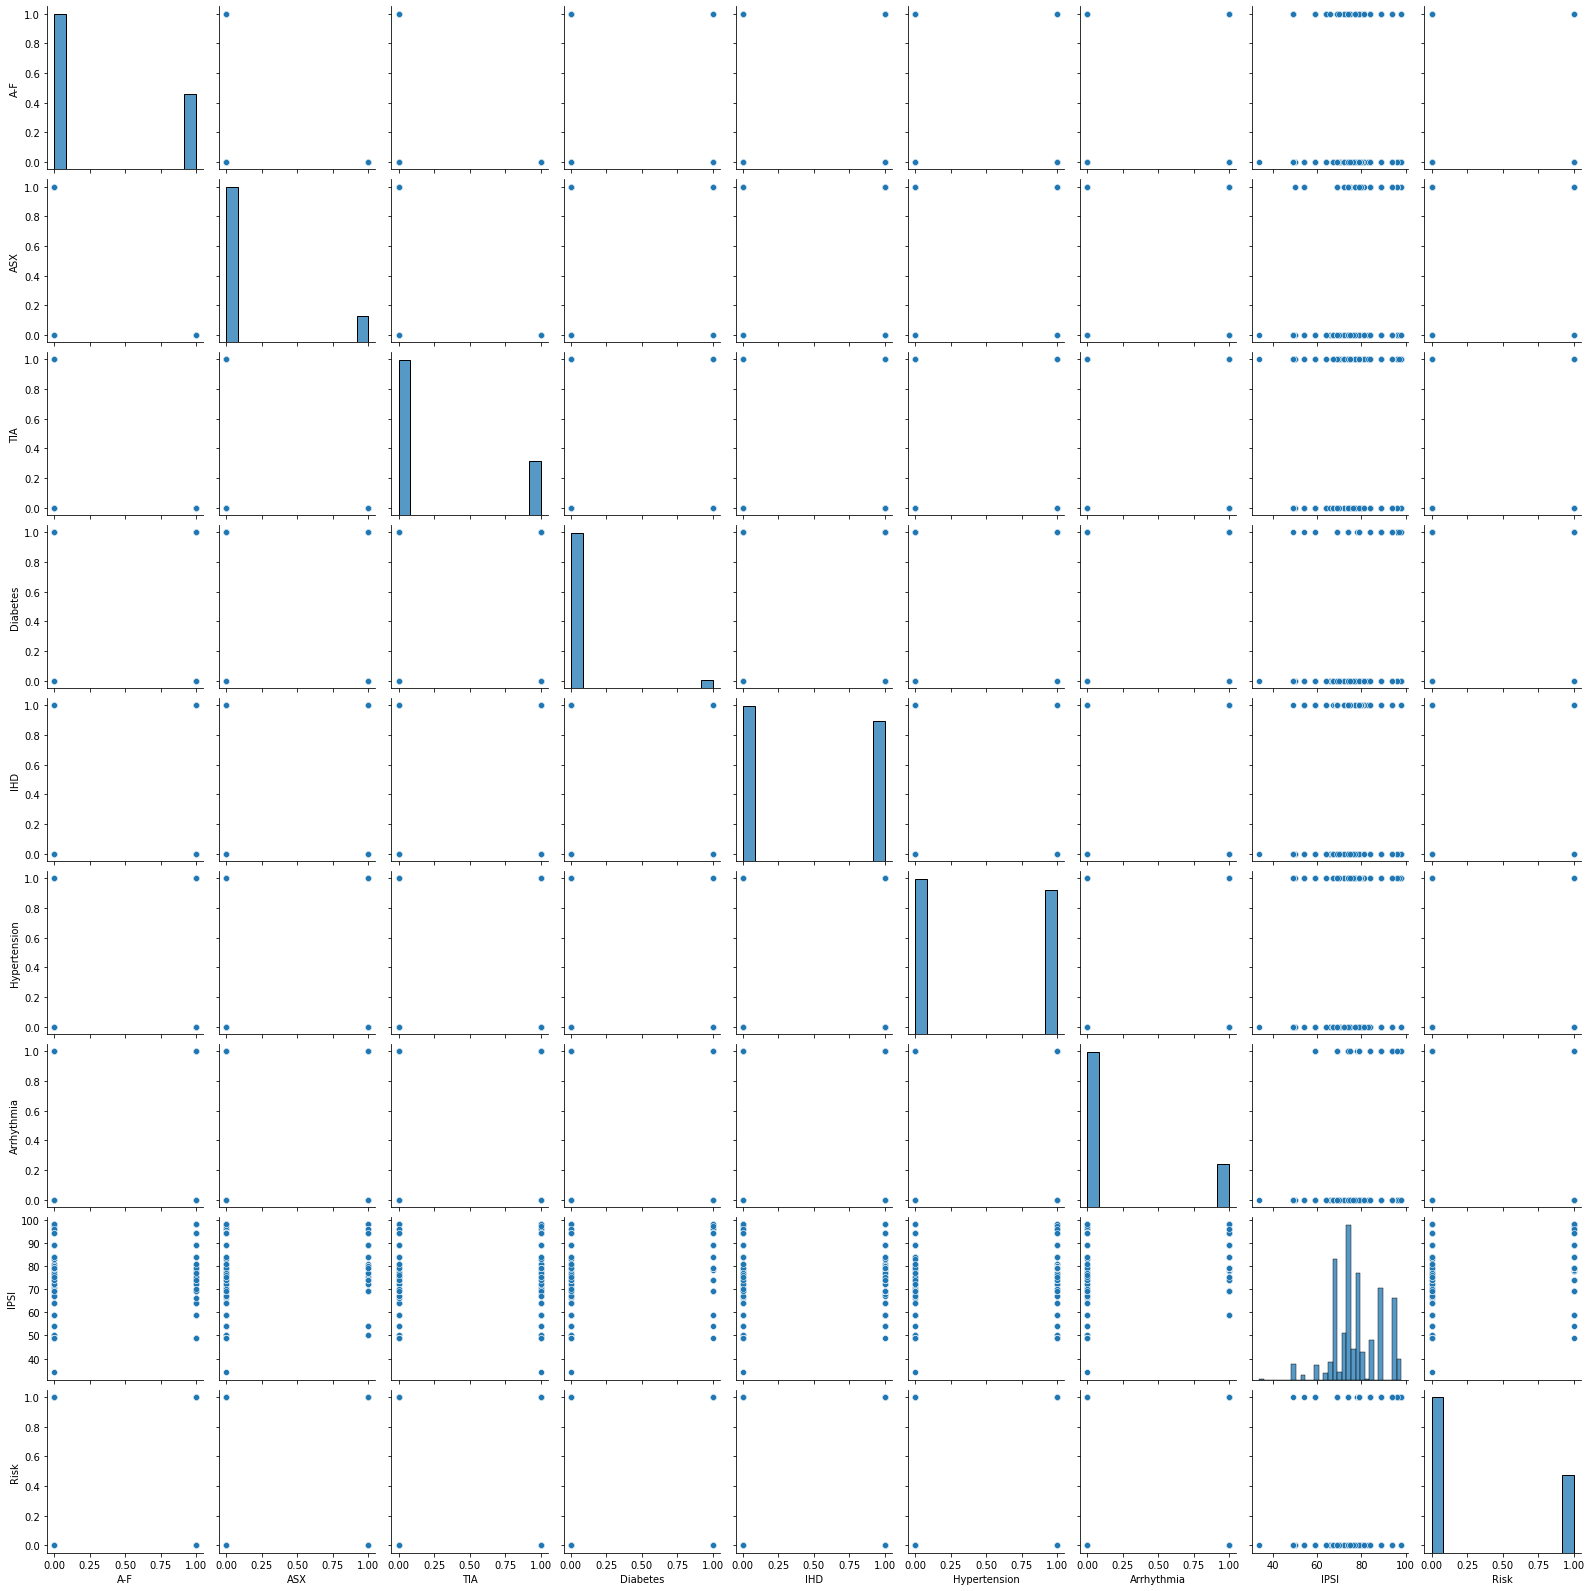

In [69]:
sns.pairplot(full_data,  hue_order = 'Risk')

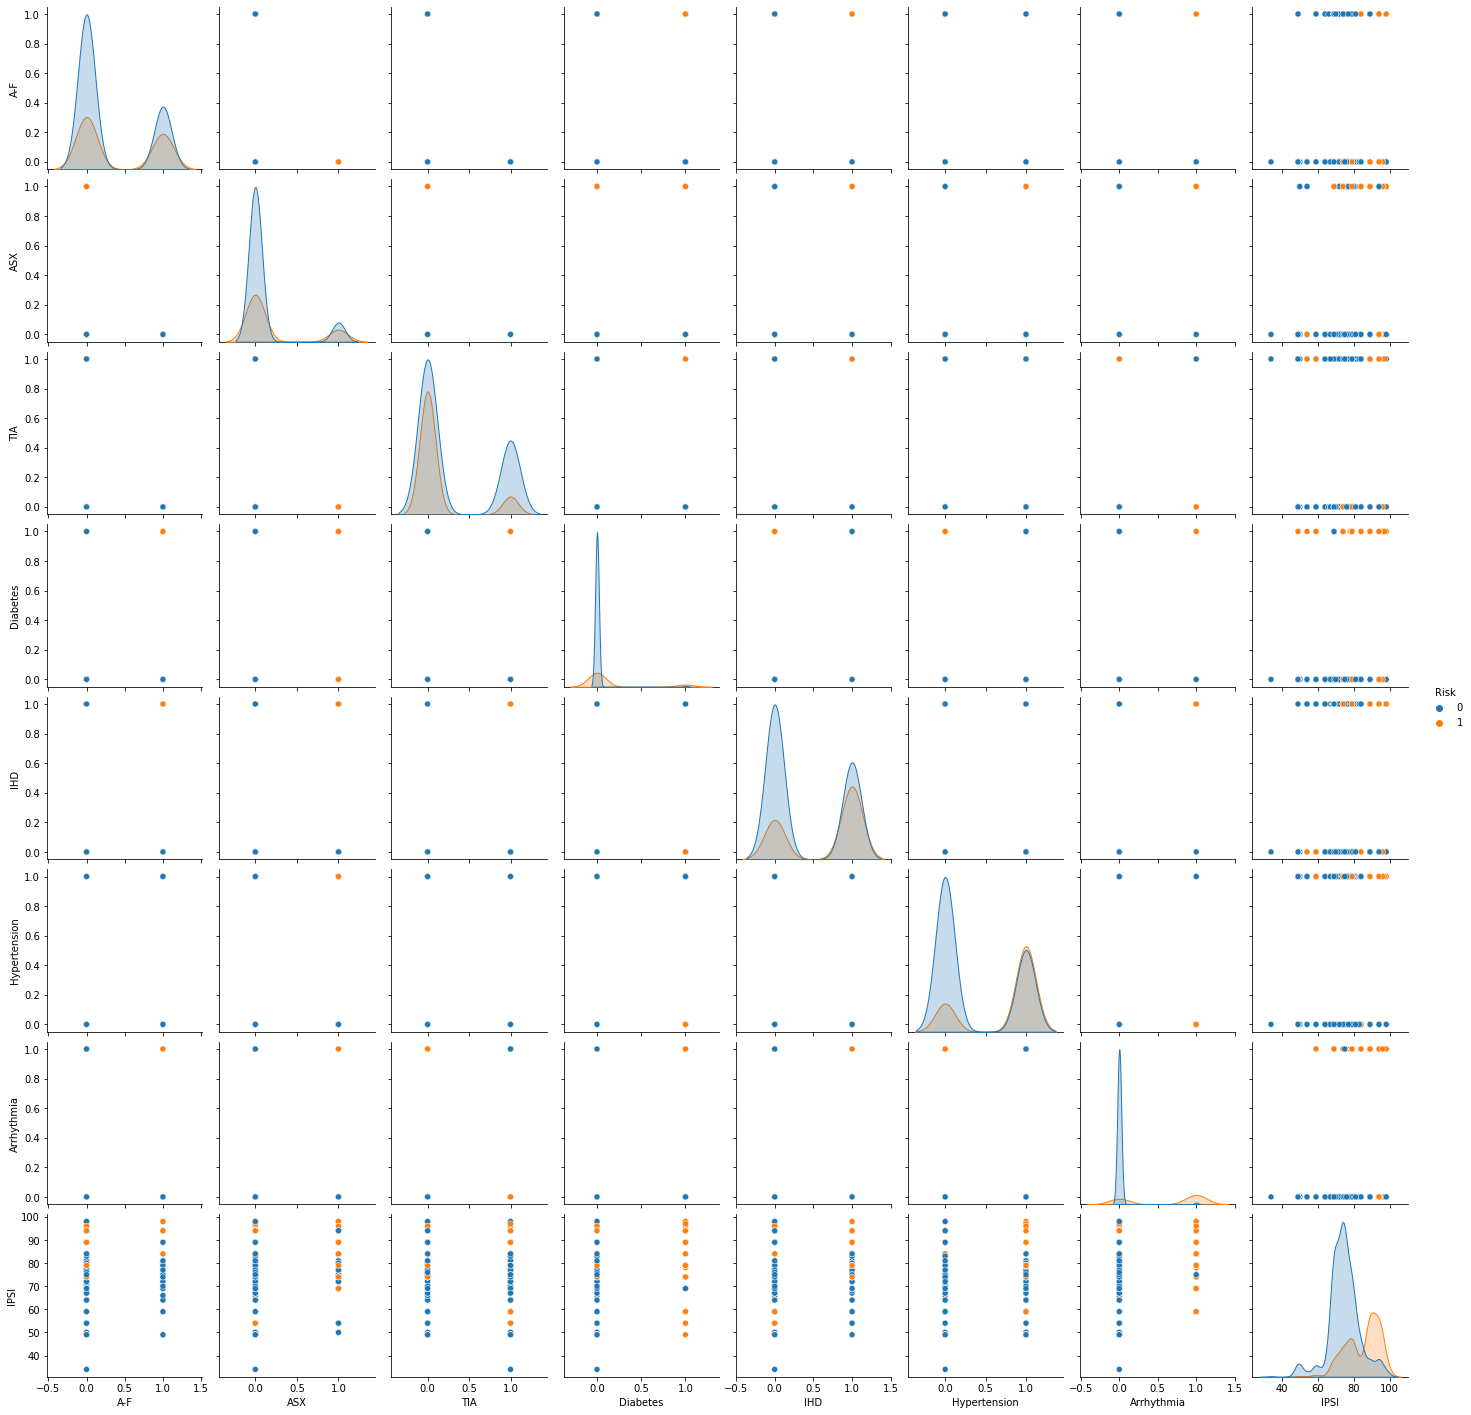

In [70]:
sns.pairplot(full_data,  hue = 'Risk')

# 6 Modeling
In this section we are going to train several models to find the best models which fits our data set. Firstly we are going to create a random training-test split for our models. We are going to use split of 70-30 and shuffle=True. In the next step we are going to create comparison algorithm which will show us a test accuracy with the boxplot graph which will help us to decide which models to train and compare them detailed after.

After comparing the test models been decided to use MLP Classifier, Decision Tree Classifier, Random Forests Classifier models. These models will be train with some of the parameters to increase the accuracy. Also, we are going to use confusion matrix to print and show the TP, TN, FP and FN score for each model which will help to decide which model is the best.
Alongside with accuracy Recall and Precision will be calculated. Precision is a good measure to determine, when the costs of False Positive is high. So Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

In addition, we are going to use optimisation of the hyper parameter algorithm to compare best accuracy result with the trained accuracy result.

In [71]:
#Create a random training-test split, of 70-30, by using shuffle=True.
import sklearn
from sklearn.model_selection import train_test_split

x = full_data.drop(['Risk'], axis=1)
y = full_data['Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=False, test_size = 0.3)

In [72]:
print("x_train: ", len(x_train))
print("x_test: ", len(x_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))
print("Rest of data: ", len(x))
print("Risk: ", len(y))

x_train:  1061
x_test:  456
y_train:  1061
y_test:  456
Rest of data:  1517
Risk:  1517


## 6.1 Checking Models
When you have a new dataset, it is a good idea to visualize the data using different techniques in order to look at the data from different perspectives.
The same idea applies to model selection. You should use a number of different ways of looking at the estimated accuracy of your machine learning algorithms in order to choose the one or two to finalize.
A way to do this is to use different visualization methods to show the average accuracy, variance and other properties of the distribution of model accuracies.


The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.
You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.
In the example below 8 different algorithms are compared:
        -Logistic Regression
        -Linear Discriminant Analysis
        -K-Nearest Neighbors
        -Classification and Regression Trees
        -Naive Bayes
        -Support Vector Machines
        -MLPClassifier
        -RandomForestClassifier
        
Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy.
The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

Code reference: https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [73]:
#import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [74]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [75]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
import warnings
warnings.filterwarnings("ignore")
for name, model in models:
    #Note: if the LDA output is nan please remove shuffle=True from the line below. In the PC has an error so had to add this line
    ##but on the laptop did not have the error so it works wothour shuffle and shows the ouput
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)# added shuffle=True didnt work for some reason on PC
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.971698 (0.018868)
LDA: nan (nan)
KNN: 0.938715 (0.027128)
CART: 0.988679 (0.012516)
NB: 0.909487 (0.027473)
SVM: 0.864257 (0.041008)
MLP: 0.925551 (0.029940)
RFC: 0.983037 (0.013205)


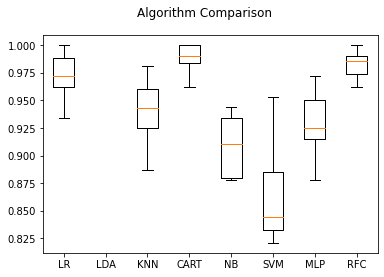

In [76]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6.2 Training MLPClassifier Model
The MLP classifier model is using neural network to solve nonlinear problems. This model optimizes the log-loss function using LBFGS or stochastic gradient descent. We are going to use solver='sgd', activation='logistic', max_iter=500000 parameters to train this model. In adition, we are going to print TP, TN, FP and FN, and accuracy, Recall and Precision.

In [77]:
#Create a MLPClassifier from sklearn, assigned to a variable called model.
##Parameters set as: solver='sgd', activation='logistic', max_iter=500000
model = MLPClassifier(solver='sgd', activation='logistic', max_iter=50000)

In [78]:
#Fit the newly created model to your training data
trained_model = model.fit(x_train, y_train)
trained_model

MLPClassifier(activation='logistic', max_iter=50000, solver='sgd')

In [79]:
#Using the test set input data (X), invoke predict on your trained model to obtain predicted class outputs
pred_y = trained_model.predict(x_test)
pred_y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [80]:
#Using sklearn confusion matrices, use the test set predicted output, and the test
##set ground truth data to plot a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_y)

array([[300,  13],
       [ 24, 119]], dtype=int64)

True Positive: 300
False Positive: 13
False Negative: 24
True Negative: 119


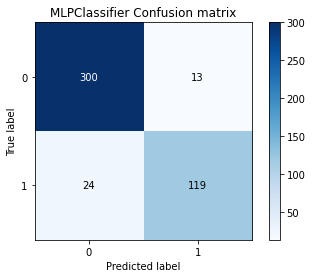

In [81]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,pred_y, title='MLPClassifier Confusion matrix')
confusion_matrix = skplt.metrics.confusion_matrix(y_test, pred_y)

TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]
   
print ('True Positive: %s'%confusion_matrix[0][0])
print ('False Positive: %s'%confusion_matrix[0][1])
print ('False Negative: %s'%confusion_matrix[1][0])
print ('True Negative: %s'%confusion_matrix[1][1])

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Calculate the accuracy of your model. This can be done using sklearn’s ‘accuracy_score’ function
accuracy = accuracy_score(y_test, pred_y)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_y)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_y)
print('Recall: %f' % recall)

Accuracy: 0.918860
Precision: 0.901515
Recall: 0.832168


### 6.2.1 Optimasing hyper parameter
We are going to optinise hyper parameters by using Grid search. Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. This is significant as the performance of the entire model is based on the hyper parameter values specified.
We are going to print two accuracy values such us the accuracy before and after optimising the hyper parameters and will compare them.

Code reference: https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998

In [83]:
from sklearn.model_selection import GridSearchCV


params_grid =  {'solver': ['sgd'],
                'activation' : ['logistic'],
                'max_iter'    : [50000]
                 }

gs = GridSearchCV(estimator=model, param_grid=params_grid, cv= 5, n_jobs = -1, verbose = 2 )

# fit the model to grid search
gs_result = gs.fit(x_train, y_train)

# print the best model frim the grid search
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_)) # best result and param

# get the best model from the grid search
best_model = gs_result.best_estimator_

# predict with the best grid search model
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.1s finished


Best: 0.868961 using {'activation': 'logistic', 'max_iter': 50000, 'solver': 'sgd'}
0.8859649122807017


## 6.3 Training DecisionTreeClassifier Model
The Decision Tree Classifier Model is one of the easiest and popular model to use for classification and regression kind of problem. The Decision Tree model is a flowchart tree structure where internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The top node is called root node which learns to partition based on the attribute value. The partition process in the tree has recursively manner which called recursive partitioning. This structure helps in decision making and visualising in flowchart diagram which makes much easier to understand.

We are going to use criterion="entropy", max_depth=3 parameters to train this model. In adition we are going to print TP, TN, FP and FN, and accuracy, Recall and Precision.

Code reference: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [84]:
#These are the feature columns of our data set except the Risk column
feature_cols = ['A-F', 'ASX', 'Indication_TIA', 'Diabetes', 
                'IHD', 'Hypertension', 'Arrhythmia', 'IPSI', 'Contra']

In [85]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [86]:
model = model.fit(X = x_train, y = y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
pred_y = model.predict(x_test)
pred_y

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

True Positive: 301
False Positive: 12
False Negative: 28
True Negative: 115


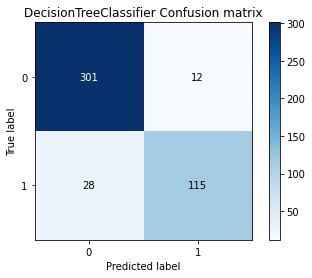

In [88]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_y, title='DecisionTreeClassifier Confusion matrix')
confusion_matrix = skplt.metrics.confusion_matrix(y_test, pred_y)

TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]
   
print ('True Positive: %s'%confusion_matrix[0][0])
print ('False Positive: %s'%confusion_matrix[0][1])
print ('False Negative: %s'%confusion_matrix[1][0])
print ('True Negative: %s'%confusion_matrix[1][1])

In [89]:
#Calculate the accuracy of your model. This can be done using sklearn’s ‘accuracy_score’ function
accuracy = accuracy_score(y_test, pred_y)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_y)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_y)
print('Recall: %f' % recall)

Accuracy: 0.912281
Precision: 0.905512
Recall: 0.804196


[Text(558.0, 951.3000000000001, 'Arrhythmia <= 0.5\nentropy = 0.928\nsamples = 1061\nvalue = [697, 364]'),
 Text(279.0, 679.5, 'Contra <= 61.0\nentropy = 0.607\nsamples = 812\nvalue = [691, 121]'),
 Text(139.5, 407.70000000000005, 'A-F <= 0.5\nentropy = 0.216\nsamples = 581\nvalue = [561, 20]'),
 Text(69.75, 135.89999999999998, 'entropy = 0.045\nsamples = 401\nvalue = [399, 2]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.469\nsamples = 180\nvalue = [162, 18]'),
 Text(418.5, 407.70000000000005, 'Hypertension <= 0.5\nentropy = 0.989\nsamples = 231\nvalue = [130, 101]'),
 Text(348.75, 135.89999999999998, 'entropy = 0.728\nsamples = 138\nvalue = [110, 28]'),
 Text(488.25, 135.89999999999998, 'entropy = 0.751\nsamples = 93\nvalue = [20, 73]'),
 Text(837.0, 679.5, 'Contra <= 32.5\nentropy = 0.164\nsamples = 249\nvalue = [6, 243]'),
 Text(697.5, 407.70000000000005, 'A-F <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(627.75, 135.89999999999998, 'entropy = 0.65\nsamples = 6\n

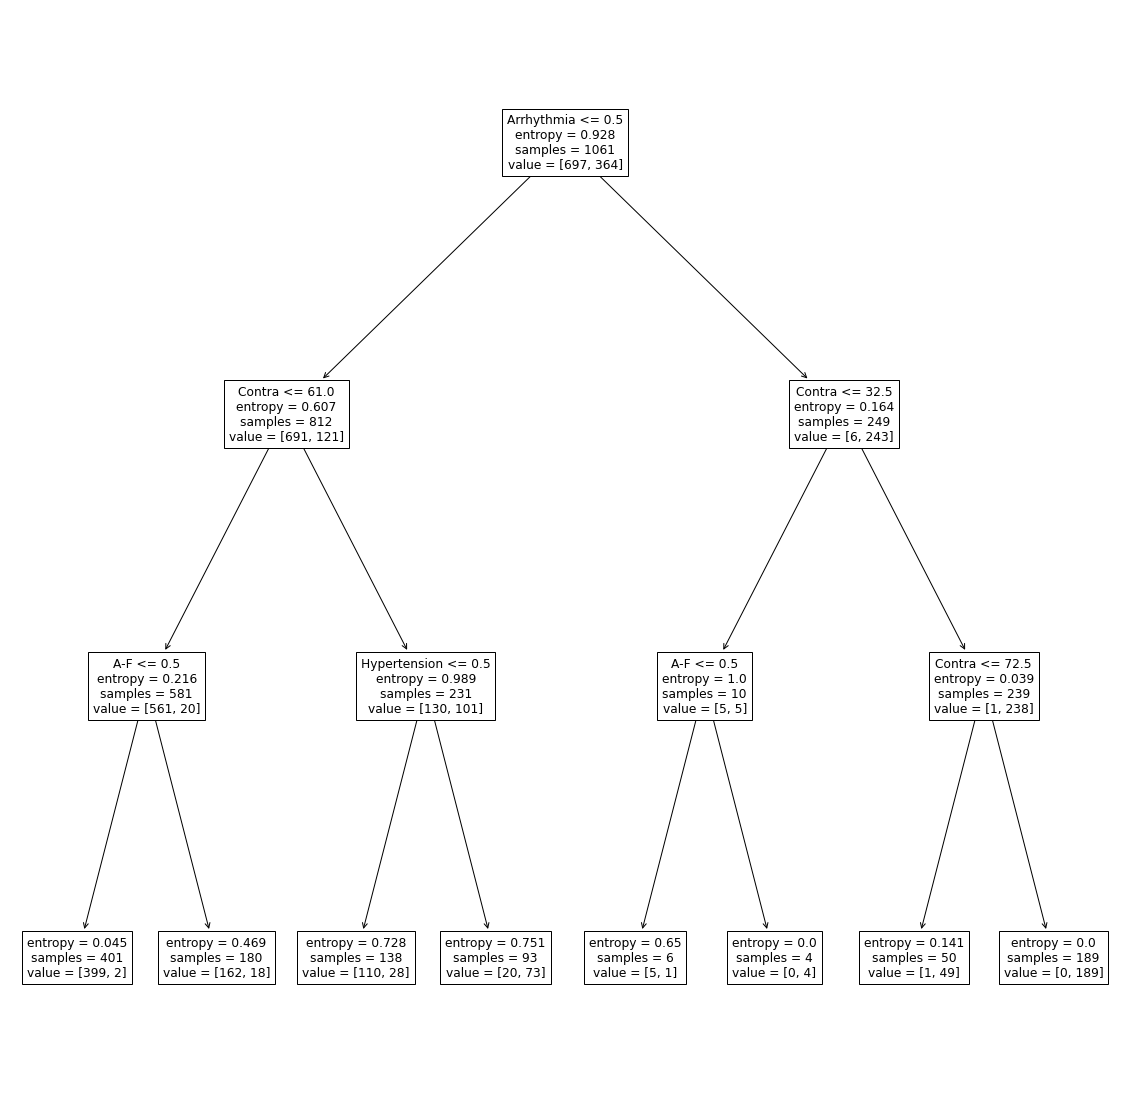

In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
plot_tree( model, feature_names =  feature_cols) #,class_names=['0','1']

### 6.3.1 Optimasing hyper parameter


In [91]:
from sklearn.model_selection import GridSearchCV


params_grid =  {'criterion': ['entropy'],
                'max_depth'    : [3]
                 }

gs = GridSearchCV(estimator=model, param_grid=params_grid, cv= 5, n_jobs = -1, verbose = 2 )

# fit the model to grid search
gs_result = gs.fit(x_train, y_train)

# print the best model frim the grid search
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_)) # best result and param

# get the best model from the grid search
best_model = gs_result.best_estimator_

# predict with the best grid search model
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s


Best: 0.919851 using {'criterion': 'entropy', 'max_depth': 3}
0.9122807017543859


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


## 6. 4 Train Random Forests Classifiers
The Random Forests Classifiers is a comprised of trees which can be used for classification and regression. The Random forests classifier creates decision trees on selected randomly data and predicts from each tree and selects the best one solution. This model is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

We are going to use n_estimators=100 parameters to train this model. In adition we are going to print TP, TN, FP and FN, and accuracy, Recall and Precision.

The Random Forests Classifier it is our most successful model as it has the highest accuracy which is the closes to the 100%. This means this model is the best model for our dataset. 

Code reference: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [92]:
model = RandomForestClassifier(n_estimators=100)
model = model.fit(X = x_train, y = y_train)
model

RandomForestClassifier()

In [93]:
pred_y = model.predict(x_test)
pred_y

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

True Positive: 311
False Positive: 2
False Negative: 4
True Negative: 139


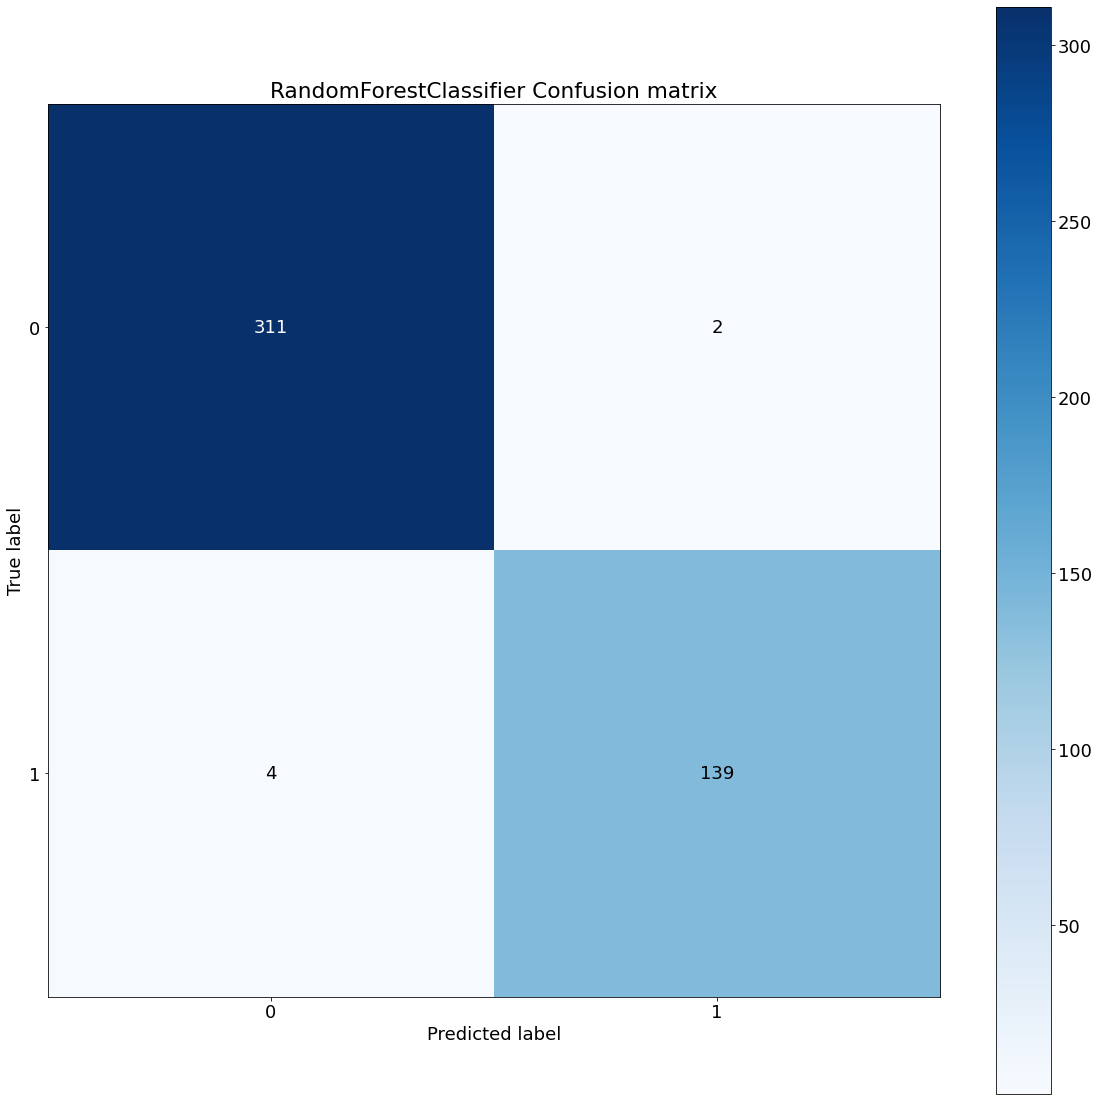

In [94]:
#import scikitplot as skplt
#fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams.update({'font.size': 18})
skplt.metrics.plot_confusion_matrix(y_test, pred_y, title='RandomForestClassifier Confusion matrix')
confusion_matrix = skplt.metrics.confusion_matrix(y_test, pred_y)

TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]
   
print ('True Positive: %s'%confusion_matrix[0][0])
print ('False Positive: %s'%confusion_matrix[0][1])
print ('False Negative: %s'%confusion_matrix[1][0])
print ('True Negative: %s'%confusion_matrix[1][1])


In [95]:
#Calculate the accuracy of your model. This can be done using sklearn’s ‘accuracy_score’ function
accuracy = accuracy_score(y_test, pred_y)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_y)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_y)
print('Recall: %f' % recall)

Accuracy: 0.986842
Precision: 0.985816
Recall: 0.972028


### 6.4.1 Optimasing hyper parameter


In [96]:
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [97]:
from sklearn.model_selection import GridSearchCV


params_grid =  {'n_estimators': [100],
                'max_depth'    : [4,6,8,10]
                 }

gs = GridSearchCV(estimator=model, param_grid=params_grid, cv= 5, n_jobs = -1, verbose = 2 )

# fit the model to grid search
gs_result = gs.fit(x_train, y_train)

# print the best model frim the grid search
print("Best: %f using %s" % (gs_result.best_score_, gs_result.best_params_)) # best result and param

# get the best model from the grid search
best_model = gs_result.best_estimator_

# predict with the best grid search model
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished


Best: 0.980202 using {'max_depth': 10, 'n_estimators': 100}
0.9846491228070176


# 7 Sequential Feature Selection and GridSearch
Use scikit-learn's GridSearch to tune the hyperparameters inside and outside the SequentialFeatureSelector:


Code Reference: https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
import mlxtend

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(estimator=knn, 
           k_features=3,
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = Pipeline([('sfs', sfs1), 
                 ('knn', knn)])

param_grid = [
  {'sfs__k_features': [1, 4],
   'sfs__estimator__n_neighbors': [1, 5, 10]}
  ]

gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=5,
                  #iid=True,
                  refit=False)

# run gridearch
gs = gs.fit(x_train, y_train)

And the "best" parameters determined by GridSearch are 

In [99]:
for i in range(len(gs.cv_results_['params'])):
    print(gs.cv_results_['params'][i], 'test acc.:', gs.cv_results_['mean_test_score'][i])

{'sfs__estimator__n_neighbors': 1, 'sfs__k_features': 1} test acc.: 0.8727920985029675
{'sfs__estimator__n_neighbors': 1, 'sfs__k_features': 4} test acc.: 0.878359464965896
{'sfs__estimator__n_neighbors': 5, 'sfs__k_features': 1} test acc.: 0.8727920985029675
{'sfs__estimator__n_neighbors': 5, 'sfs__k_features': 4} test acc.: 0.878359464965896
{'sfs__estimator__n_neighbors': 10, 'sfs__k_features': 1} test acc.: 0.8727920985029675
{'sfs__estimator__n_neighbors': 10, 'sfs__k_features': 4} test acc.: 0.878359464965896


In [100]:
print("Best parameters via GridSearch", gs.best_params_)

Best parameters via GridSearch {'sfs__estimator__n_neighbors': 1, 'sfs__k_features': 4}


## 7.1 Obtaining the best k feature indices after GridSearch
If we are interested in the best k feature indices via SequentialFeatureSelection.k_feature_idx_, we have to initialize a GridSearchCV object with refit=True. Now, the grid search object will take the complete training dataset and the best parameters, which it found via cross-validation, to train the estimator pipeline.

In [101]:
gs = GridSearchCV(estimator=pipe, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  n_jobs=1, 
                  cv=5, 
                  #iid=True,
                  refit=True)
gs = gs.fit(x_train, y_train)

After running the grid search, we can access the individual pipeline objects of the best_estimator_ via the steps attribute.

In [102]:
gs.best_estimator_.steps

[('sfs',
  SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=1),
                            k_features=4, scoring='accuracy')),
 ('knn', KNeighborsClassifier(n_neighbors=2))]

Via sub-indexing, we can then obtain the best-selected feature subset:

In [103]:
print('Best features:', gs.best_estimator_.steps[0][1].k_feature_idx_)

Best features: (4, 6, 7, 8)


During cross-validation, this feature combination had a CV accuracy of:

In [104]:
print('Best score:', gs.best_score_)

Best score: 0.878359464965896


In [105]:
gs.best_params_

{'sfs__estimator__n_neighbors': 1, 'sfs__k_features': 4}

Just to ensure that the values were indeed assigned correctly, the following number of neighbors should match the one above:

In [106]:
gs.estimator.named_steps['sfs'].estimator.n_neighbors

2

Alternatively, if we can set the "best grid search parameters" in our pipeline manually if we ran GridSearchCV with refit=False. It should yield the same results:

In [107]:
pipe.set_params(**gs.best_params_).fit(x_train, y_train)
print('Best features:', pipe.steps[0][1].k_feature_idx_)

Best features: (4, 6, 7, 8)
